In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
os.chdir("/Users/darsh/Documents/Data Science/Bike Rental Project/Python/")

In [3]:
# Load dataset
train = pd.read_csv('day.csv')

In [4]:
# Backing up the ID variable from train and test datasets
data_key = train.instant
data_target = train.cnt

In [5]:
# Droppping the ID variable from train and test datasets
train.drop(axis = 1, columns = 'instant', inplace = True)

In [6]:
# Checking for missing values
train.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Splitting train dataset into dependent and independent variables
x = train.loc[:, train.columns != 'cnt']
y =train.cnt

In [8]:
train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
train.set_index("dteday", drop=True, inplace=True)

In [10]:
discrete =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous=['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt']

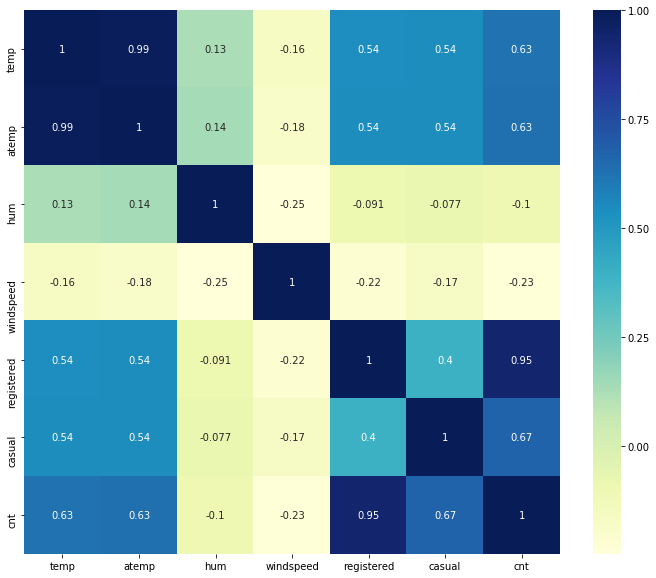

In [11]:
cor = train.loc[:, continuous].reset_index(drop = True).corr()

#plot heatmap 
f,ax =plotter.subplots(figsize=(12, 10))
sns.heatmap(cor , cmap='YlGnBu', ax=ax, annot=True)

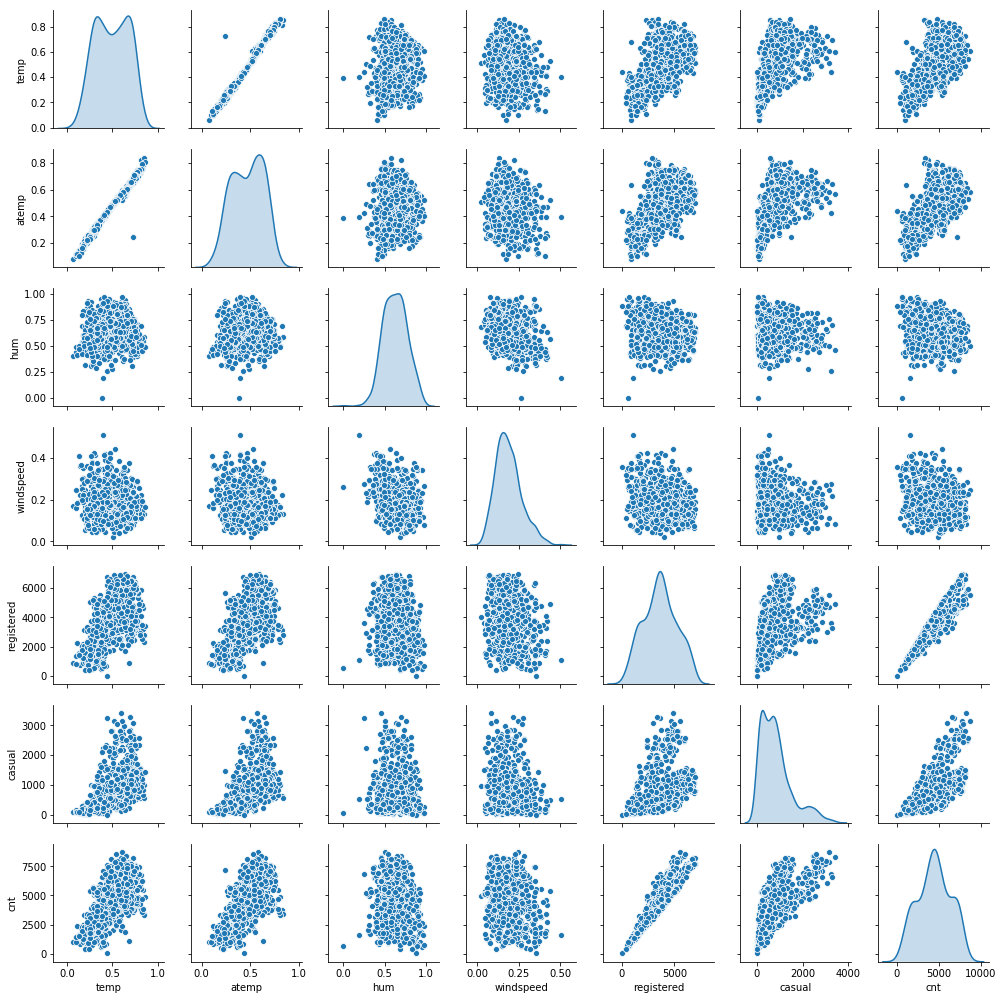

In [12]:
#pair plot for numeric variable analysis 
train[continuous]
sns.pairplot(data=train[continuous], height=2, diag_kind="kde")
plotter.show()

In [13]:
#Dropping casual and registered variables as they are highly correlated to cnt
#and dropping atemp since it is highly correlated to temp
train.drop(columns = ['registered', 'casual', 'atemp'], inplace = True)
continuous.remove('registered')
continuous.remove('casual')
continuous.remove('atemp')
continuous.remove('cnt')

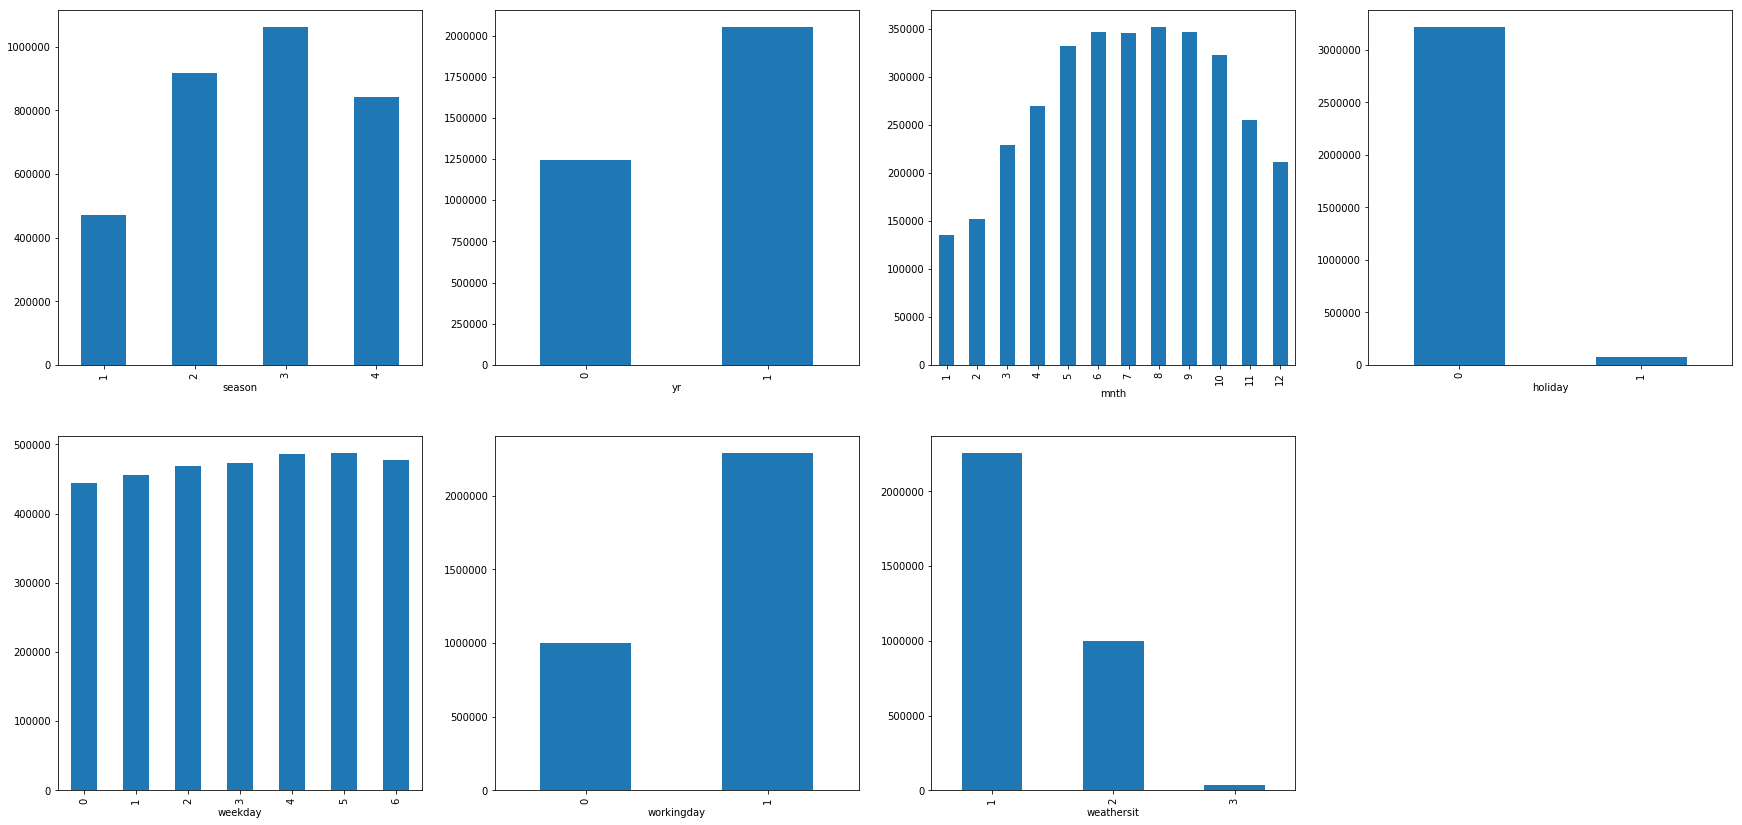

In [14]:
count = 441
plotter.figure(figsize = (30,30))
for i in discrete:
    plotter.subplot(count)
    train.groupby(by = i)['cnt'].sum().plot(kind = 'bar')
    count += 1

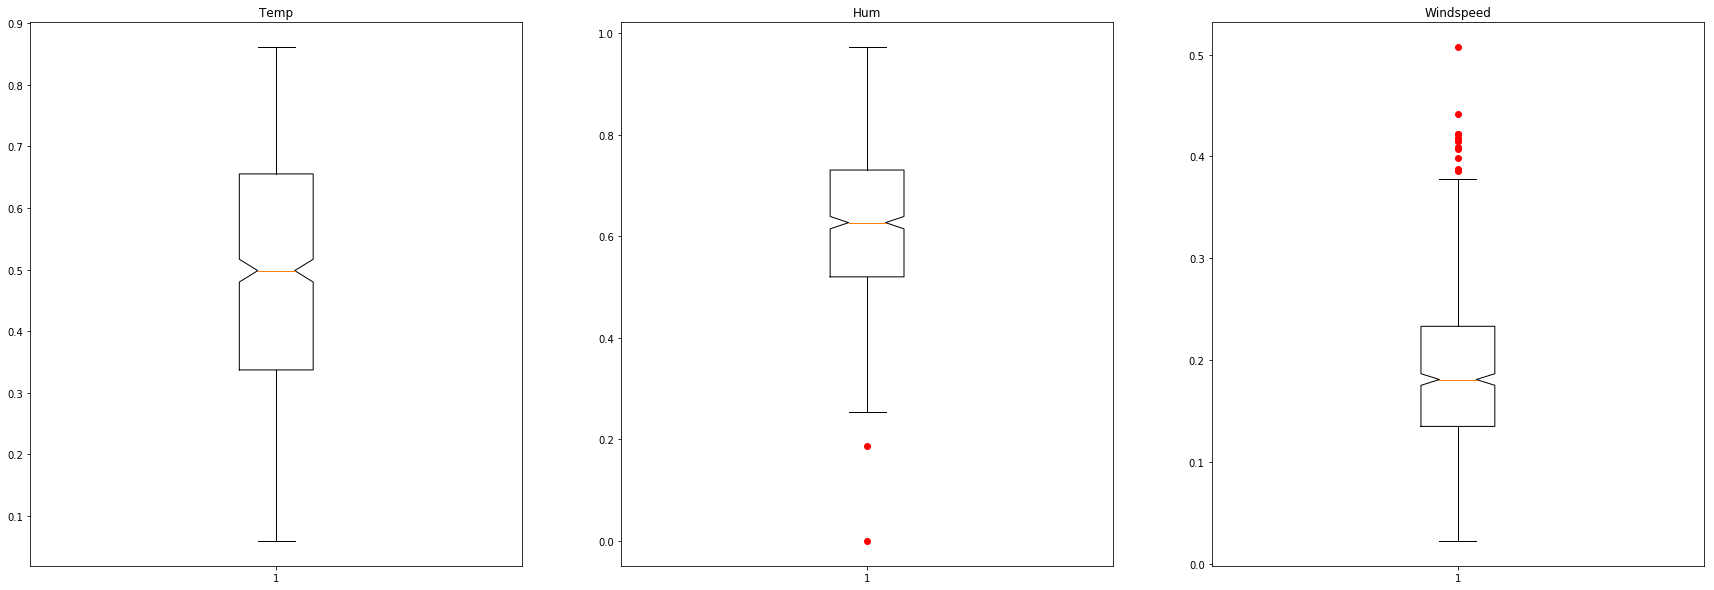

In [15]:
count = 131
plotter.figure(figsize = (30,10))
for i in continuous:
    plotter.subplot(count)
    plotter.boxplot(train.loc[:, i],notch=True, sym = 'r')
    plotter.title(i.capitalize())
    count += 1

In [16]:
for i in continuous:
    
    q75, q25 = np.percentile(train.loc[:, i], [75, 25])
    
    iqr = q75 - q25
    
    lower = q25 - (1.5 * iqr)
    upper = q75 + (1.5 * iqr)
    
    train.loc[train[i] < lower ,i] = np.nan
    train.loc[train[i] > upper ,i] = np.nan

In [17]:
train.isnull().any()

season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
hum            True
windspeed      True
cnt           False
dtype: bool

In [18]:
train.fillna(train.median(), inplace = True)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'cnt'], train.cnt, test_size=0.25, random_state=160)

In [20]:
#Evaluating algorithms
#Decision Tree Model

model_rpart = DecisionTreeRegressor(max_depth=10).fit(x_train,y_train)
print('Decision Tree Model')
print("Model score: " + str(model_rpart.score(x_test, y_test)))
predictions = model_rpart.predict(x_test)
print("MAPE: " + str(np.mean(np.abs((y_test - predictions) / y_test))*100))

Decision Tree Model
Model score: 0.7837752272846971
MAPE: 18.66004593451133


In [21]:
#RandomForest Model

model_rf = RandomForestRegressor(n_estimators = 50).fit(x_train, y_train)
print('RandomForest Model')
print("Model score: " + str(model_rf.score(x_test, y_test)))
predictions = model_rf.predict(x_test)
print("MAPE: " + str(np.mean(np.abs((y_test - predictions) / y_test))*100))

RandomForest Model
Model score: 0.8571629789577553
MAPE: 15.548072766012359


In [22]:
#Linear Regression Model
model_lm = LinearRegression().fit(x_train, y_train)
print('Linear Regression Model')
print("Model score: " + str(model_lm.score(x_test, y_test)))
predictions = model_lm.predict(x_test)
print("MAPE: " + str(np.mean(np.abs((y_test - predictions) / y_test))*100))

Linear Regression Model
Model score: 0.7503433111679002
MAPE: 18.678071778811184
